<a href="https://colab.research.google.com/github/Mounika-505/programs/blob/main/OCR_%2B_Translate_%2B_TTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install googletrans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install gTTS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!wget https://i.stack.imgur.com/mk1jX.jpg

--2023-01-20 17:16:00--  https://i.stack.imgur.com/mk1jX.jpg
Resolving i.stack.imgur.com (i.stack.imgur.com)... 146.75.92.193
Connecting to i.stack.imgur.com (i.stack.imgur.com)|146.75.92.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45178 (44K) [image/jpeg]
Saving to: ‘mk1jX.jpg.1’

mk1jX.jpg.1         100%[===================>]  44.12K   263KB/s    in 0.2s    

2023-01-20 17:16:01 (263 KB/s) - ‘mk1jX.jpg.1’ saved [45178/45178]



In [6]:
from googletrans import Translator
import easyocr
from gtts import gTTS
from IPython.display import Audio

In [7]:
reader = easyocr.Reader(['ta'])
translator = Translator()

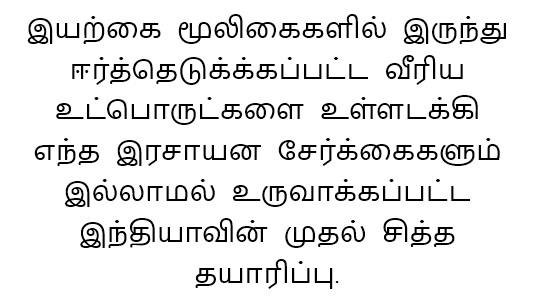

In [8]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("mk1jX.jpg")
im

In [9]:
bounds = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-')
bounds

[([[32, 0], [532, 0], [532, 70], [32, 70]],
  'இயற்கை மூலிகைகளில் இருந்து',
  0.6867488310031326),
 ([[49, 29], [489, 29], [489, 110], [49, 110]],
  'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
  0.6868853573858811),
 ([[38, 77], [324, 77], [324, 146], [38, 146]],
  'உட்பொருட்களை ',
  0.7337805391185389),
 ([[304, 78], [496, 78], [496, 140], [304, 140]],
  'உள்ளடக்கி',
  0.8162042033438105),
 ([[14, 118], [523, 118], [523, 188], [14, 188]],
  'ந்த இரசாயன சேர்க்கைகளும்',
  0.5782430293037929),
 ([[71, 156], [491, 156], [491, 229], [71, 229]],
  'இல்லாமல் உருவாக்கப்பட்ட',
  0.9701047879510687),
 ([[60, 195], [478, 195], [478, 272], [60, 272]],
  'இந்தியாவின் முதல் சித்த',
  0.9655595104214594),
 ([[174, 237], [359, 237], [359, 303], [174, 303]],
  'தயாரிப்பு',
  0.41641521891293964)]

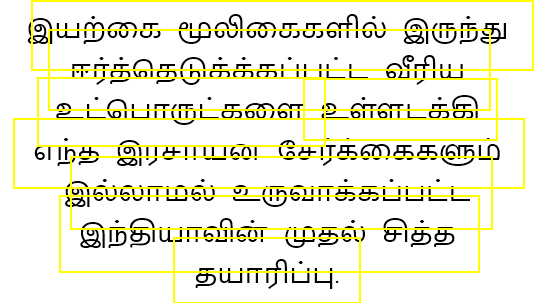

In [10]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [11]:
text_list = reader.readtext('mk1jX.jpg', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-', detail=0)
text_list

['இயற்கை மூலிகைகளில் இருந்து',
 'ஈர்த்தெடுக்க்கப்பட்ட வீரிய',
 'உட்பொருட்களை ',
 'உள்ளடக்கி',
 'ந்த இரசாயன சேர்க்கைகளும்',
 'இல்லாமல் உருவாக்கப்பட்ட',
 'இந்தியாவின் முதல் சித்த',
 'தயாரிப்பு']

In [12]:
text_comb=' '.join(text_list)
text_comb

'இயற்கை மூலிகைகளில் இருந்து ஈர்த்தெடுக்க்கப்பட்ட வீரிய உட்பொருட்களை  உள்ளடக்கி ந்த இரசாயன சேர்க்கைகளும் இல்லாமல் உருவாக்கப்பட்ட இந்தியாவின் முதல் சித்த தயாரிப்பு'

In [13]:
print(translator.detect(text_comb))


Detected(lang=ta, confidence=1)


In [14]:
text_en=translator.translate(text_comb, src='ta')
print(text_en.text)

India's first Siddha product formulated without chemical additives containing active ingredients extracted from natural herbs


In [15]:
ta_tts=gTTS(text_en.text)
ta_tts.save('trans.mp3')

In [16]:
Audio('trans.mp3' , autoplay=True)

In [17]:
ta_tts=gTTS(text_en.text, lang='ja')
ta_tts.save('trans.mp3')

In [18]:
Audio('trans.mp3' , autoplay=True)

In [19]:
text_hi=translator.translate(text_comb, src='ta',dest='hi')
print(text_hi.text)

भारत का पहला सिद्ध उत्पाद प्राकृतिक जड़ी-बूटियों से निकाले गए सक्रिय अवयवों वाले रासायनिक योजक के बिना तैयार किया गया


In [20]:
ta_tts_hi=gTTS(text_hi.text, lang='hi')
ta_tts_hi.save('trans_hi.mp3')

In [21]:
Audio('trans_hi.mp3' , autoplay=True)

In [22]:
text_fr=translator.translate(text_comb, src='ta',dest='fr')
print(text_fr.text)

Le premier produit Siddha de l'Inde formulé sans additifs chimiques contenant des ingrédients actifs extraits d'herbes naturelles


In [23]:
ta_tts_fr=gTTS(text_fr.text, lang='fr')
ta_tts_fr.save('trans_fr.mp3')

In [24]:
Audio('trans_fr.mp3' , autoplay=True)